# Q 6
* X1 = hours studied 
* X2 = undergrad GPA
* Y = receive an A

* βˆ0 = −6
* βˆ1 = 0.05
* βˆ2 = 1

#### A] 
* X1 = 40 
* X2 = 3.5
* -6 + 0.05 X1 + X2 
* -6 + 0.05 *40 + 3.5 = -0.5
* Estimated probability = e^-0.5 / (1+ e^-0.5) = 0.37754


#### B] 
* Estimated probability = e^-6 + 0.05 *X1 + 3.5 / (1+ e^-6 + 0.05 *X1 + 3.5) = 0.5
* since the estimated probability = 0.5 = 1/2, then e^-6 + 0.05 *X1 + 3.5 = 1
* Then we take the log of both sides to get -6 + 0.05 *X1 + 3.5 = 0
* X1 = 2.5/0.05 = 50

# Q 9
#### A] 
* odds = p(x)/1-p(x) = 0.37, so we want to solve fro p(x)
* p(x)=0.37/1.37 = 0.27, so on average there are 27% of people defaulting on their credit card payment

#### B]
* odds = p(x)/1-p(x) = 0.16/(1-0.16) = 0.19



# Q 10

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import pyreadr



result = pyreadr.read_r('ISLR/data/Weekly.rda')
print(result.keys())
df = result["Weekly"]
df.head()

odict_keys(['Weekly'])


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990.0,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990.0,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [218]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [219]:
print(df.describe())


              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

## comments on summary

* cross validation
* Y= Direction
* predictors = Lag1	Lag2	Lag3	Lag4	Lag5	Volume


### B) Use the full data set to perform a logistic regression

In [220]:
from sklearn.linear_model import LogisticRegression
from regressors import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import pandas as pd  


formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Sat, 27 Feb 2021   Deviance:                       1486.4
Time:                                          23:39:42   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e



# Confusion Matrix
#### c) Compute the confusion matrix and overall fraction of correct predictions.
#### Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.


In [221]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = result.predict()
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
confusion_matrix(df["Direction"], predictions_nominal)


array([[ 54, 430],
       [ 48, 557]])

##### Confusion Matrix Explanation
* (tn= 54, fp= 430, fn= 48, tp= 557)
* Accuracy: Overall, how often is the classifier correct?
  - (TP+TN)/total 
  - (54+557)/1089 wich is equal to 56.1065197%
* Misclassification Rate: Overall, how often is it wrong?
  - (FP+FN)/total
  - = 1 - Accuracy =  43.8934803% is the training error rate

## d) fit the logistic regression model using a training data period from 1990 to 2008,

In [222]:

df1 = df[df['Year'] <= 2008.0] 
df2 = df[df['Year'] > 2008.0]

formula = 'Direction ~ Lag2'
model = smf.glm(formula = formula, data=df1, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      983
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -675.27
Date:                                  Sat, 27 Feb 2021   Deviance:                       1350.5
Time:                                          23:39:46   Pearson chi2:                     985.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [226]:
from sklearn.metrics import confusion_matrix, classification_report

predictions2 = result.predict(df2)
predictions_nominal2 = [ "Up" if x < 0.5 else "Down" for x in predictions2]

confusion_matrix(df2["Direction"], predictions_nominal2)


array([[ 9, 34],
       [ 5, 56]])

# (e) Linear Discriminant Analysis

In [227]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline
X_train = df1[['Lag2']]
y_train = df1['Direction']

X_test = df2[['Lag2']]
y_test = df2['Direction']

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)


predictions2 = model.predict(X_test)
#predictions_nominal2 = [ "Up" if x < 0.5 else "Down" for x in predictions2]
confusion_matrix(df2["Direction"], predictions_nominal2)

print(model.priors_)
print(model.means_)
print(model.coef_)
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[0.44771574 0.55228426]
[[-0.03568254]
 [ 0.26036581]]
[[0.05768451]]
(array(['Down', 'Up'], dtype='<U4'), array([14, 90]))
[[ 9  5]
 [34 56]]
              precision    recall  f1-score   support

        Down      0.643     0.209     0.316        43
          Up      0.622     0.918     0.742        61

    accuracy                          0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104



# (f) Quadratic Discriminant Analysis

In [228]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)

pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

[0.44771574 0.55228426]
[[-0.03568254]
 [ 0.26036581]]
(array(['Up'], dtype=object), array([104]))
[[ 0  0]
 [43 61]]
              precision    recall  f1-score   support

        Down      0.000     0.000     0.000        43
          Up      0.587     1.000     0.739        61

    accuracy                          0.587       104
   macro avg      0.293     0.500     0.370       104
weighted avg      0.344     0.587     0.434       104



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# (g) K-Nearest Neighbors, K=1

In [229]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import neighbors

In [230]:
X_train = df1[['Lag2']]
y_train = df1['Direction']

X_test = df2[['Lag2']]
y_test = df2['Direction']

knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
pred = knn.fit(X_train, y_train).predict(X_test)


print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[21 30]
 [22 31]]
              precision    recall  f1-score   support

        Down      0.412     0.488     0.447        43
          Up      0.585     0.508     0.544        61

    accuracy                          0.500       104
   macro avg      0.498     0.498     0.495       104
weighted avg      0.513     0.500     0.504       104



### K= 3

In [231]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[15 20]
 [28 41]]
              precision    recall  f1-score   support

        Down      0.429     0.349     0.385        43
          Up      0.594     0.672     0.631        61

    accuracy                          0.538       104
   macro avg      0.511     0.510     0.508       104
weighted avg      0.526     0.538     0.529       104



In [232]:
for k in range(10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k+1)
    pred = knn.fit(X_train, y_train).predict(X_test)

    print(confusion_matrix(y_test, pred).T)
    print(classification_report(y_test, pred, digits=3))

[[21 30]
 [22 31]]
              precision    recall  f1-score   support

        Down      0.412     0.488     0.447        43
          Up      0.585     0.508     0.544        61

    accuracy                          0.500       104
   macro avg      0.498     0.498     0.495       104
weighted avg      0.513     0.500     0.504       104

[[31 43]
 [12 18]]
              precision    recall  f1-score   support

        Down      0.419     0.721     0.530        43
          Up      0.600     0.295     0.396        61

    accuracy                          0.471       104
   macro avg      0.509     0.508     0.463       104
weighted avg      0.525     0.471     0.451       104

[[15 20]
 [28 41]]
              precision    recall  f1-score   support

        Down      0.429     0.349     0.385        43
          Up      0.594     0.672     0.631        61

    accuracy                          0.538       104
   macro avg      0.511     0.510     0.508       104
weighted avg     

#### (h) Which of these methods appears to provide the best results on this data?

* To answer this question, we need to compare the test error rates for each model


# Q 11 Auto data set

In [233]:
df = pd.read_csv('auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a)

In [234]:
mpg_median = df['mpg'].median()
print("mpg_median =", mpg_median)
df['mpg01'] = np.where(df['mpg'] > mpg_median, 1, 0)
df.head()

mpg_median = 23.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


### (b) Explore the data graphically


In [235]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,mpg01
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.837419
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.736711
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.736608
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.745046
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.316618
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.448150
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.512200
mpg01,0.837419,-0.736711,-0.736608,-0.745046,0.316618,0.448150,0.512200,1.000000


* Based on the correlation results, if we take 0.6 as a threshold for the correlation, then there are four features that correlate with the "mpg01", [cylinders	displacement	weight	acceleration]

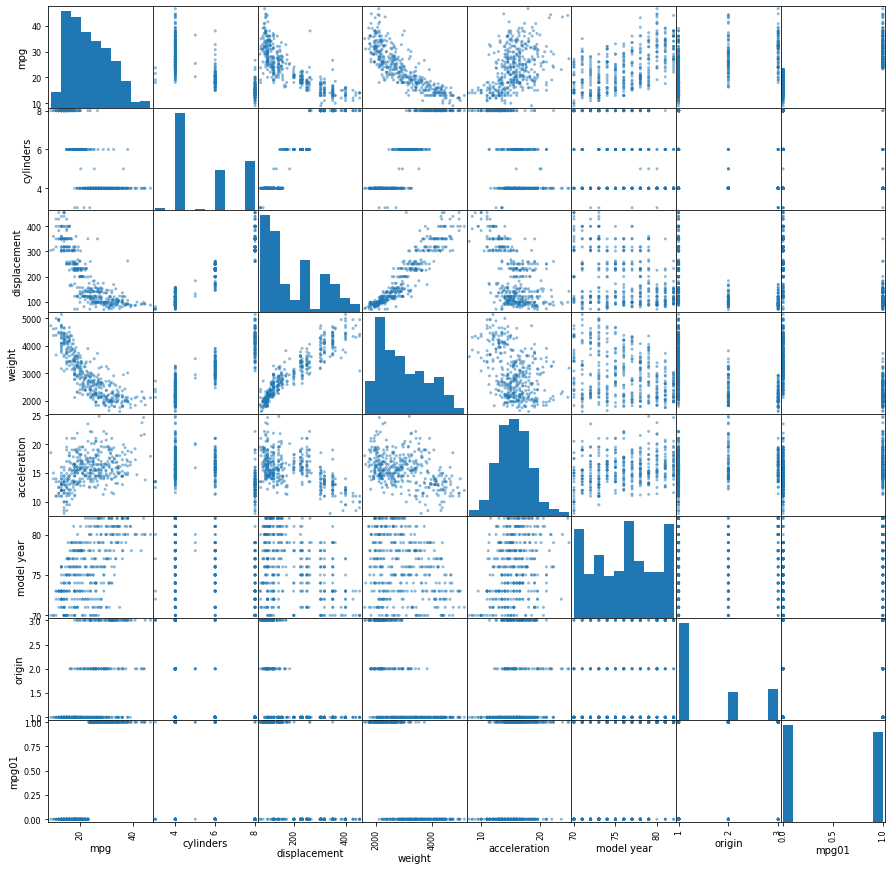

In [236]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()


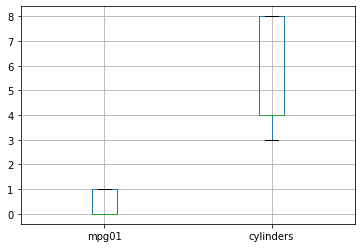

In [237]:
boxplot = df.boxplot(column=['mpg01', 'cylinders'])

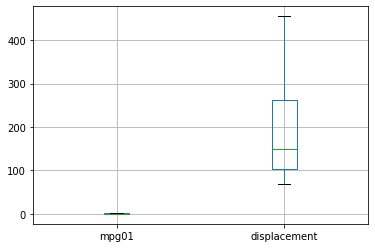

In [238]:
boxplot = df.boxplot(column=['mpg01', 'displacement'])

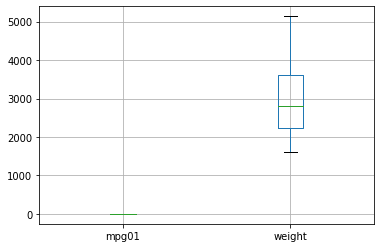

In [239]:
boxplot = df.boxplot(column=['mpg01', 'weight'])

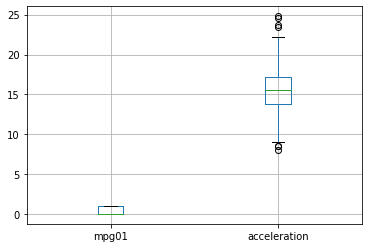

In [240]:

boxplot = df.boxplot(column=['mpg01', 'acceleration'])

### (c) Split the data into a training set and a test set.

In [241]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

X_train = train[['cylinders','displacement','weight','acceleration']]
y_train = train['mpg01']

X_test = test[['cylinders','displacement','weight','acceleration']]
y_test = test['mpg01']

### LDA

In [242]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

print(model.priors_)
print(model.means_)
print(model.coef_)
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[0.52515723 0.47484277]
[[   6.65868263  267.43113772 3590.50299401   14.65688623]
 [   4.13245033  111.66225166 2300.56953642   16.5794702 ]]
[[-1.04767864  0.00334003 -0.00272853 -0.01548119]]
(array([0, 1]), array([35, 45]))
[[32  3]
 [ 8 37]]
              precision    recall  f1-score   support

           0      0.914     0.800     0.853        40
           1      0.822     0.925     0.871        40

    accuracy                          0.863        80
   macro avg      0.868     0.863     0.862        80
weighted avg      0.868     0.863     0.862        80



### QDA

In [243]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)

pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

[0.52515723 0.47484277]
[[   6.65868263  267.43113772 3590.50299401   14.65688623]
 [   4.13245033  111.66225166 2300.56953642   16.5794702 ]]
(array([0, 1]), array([39, 41]))
[[34  5]
 [ 6 35]]
              precision    recall  f1-score   support

           0      0.872     0.850     0.861        40
           1      0.854     0.875     0.864        40

    accuracy                          0.863        80
   macro avg      0.863     0.863     0.862        80
weighted avg      0.863     0.863     0.862        80



### logistic regression

In [244]:
formula = 'mpg01 ~ cylinders+displacement+weight+acceleration'
model = smf.glm(formula = formula, data=train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

predictions = result.predict(test)
print(predictions[0:10])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  318
Model:                            GLM   Df Residuals:                      313
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -86.382
Date:                Sat, 27 Feb 2021   Deviance:                       172.76
Time:                        23:40:11   Pearson chi2:                     260.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.7552      1.981      3.914   

### KNN

In [245]:
for k in range(10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k+1)
    pred = knn.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, pred, digits=3))
    print(confusion_matrix(y_test, pred).T)

              precision    recall  f1-score   support

           0      0.875     0.875     0.875        40
           1      0.875     0.875     0.875        40

    accuracy                          0.875        80
   macro avg      0.875     0.875     0.875        80
weighted avg      0.875     0.875     0.875        80

[[35  5]
 [ 5 35]]
              precision    recall  f1-score   support

           0      0.783     0.900     0.837        40
           1      0.882     0.750     0.811        40

    accuracy                          0.825        80
   macro avg      0.832     0.825     0.824        80
weighted avg      0.832     0.825     0.824        80

[[36 10]
 [ 4 30]]
              precision    recall  f1-score   support

           0      0.892     0.825     0.857        40
           1      0.837     0.900     0.867        40

    accuracy                          0.863        80
   macro avg      0.865     0.863     0.862        80
weighted avg      0.865     0.863   